In [ ]:
## Mutations Analysis

In [2]:
### Load Libraries ###

library('dplyr')
library('tidyr')
library('ggplot2')
library('tidyverse')
library(reshape2)
library(ggrepel)
library(ggthemes)
library(hrbrthemes)

In [12]:
## Treatment
ms_filt <- cbind(read.csv('../../MS_filt_all_mut.csv')[,-1],Treatment='MS')
ss_filt <- cbind(read.csv('../../SS_filt_all_mut.csv')[,-1],Treatment='SS')
ms_ss_filt <- rbind((ms_filt) %>% select(position,mutation,Phase1,Phase2,Phase3,
                           annotation,MutType,gene,description,Replic,Treatment),
(ss_filt)%>% select(position,mutation,Phase1,Phase2,Phase3,annotation,MutType,gene,description,Replic,Treatment))

In [13]:
ms_ss_filt <- ms_ss_filt %>% mutate(MutType=recode(MutType, 
                        `Nsyn`='Non-Synonymous',
                         `Syn`='Synonymous',
                         `IS5-mediated`='IS-mediated',
                        `Indel`='Short Indel'))

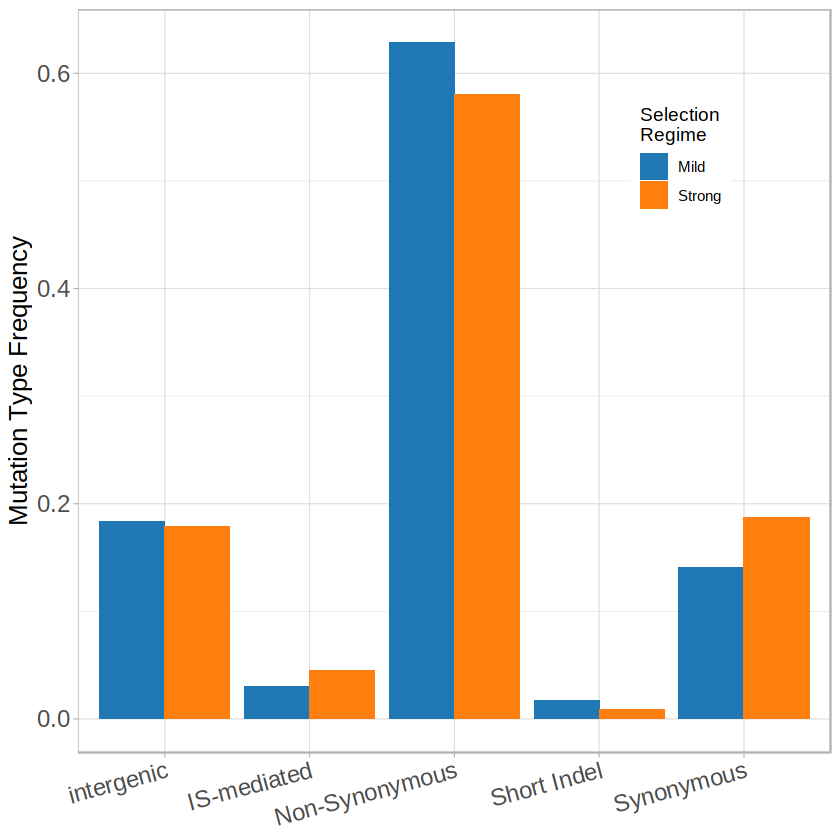

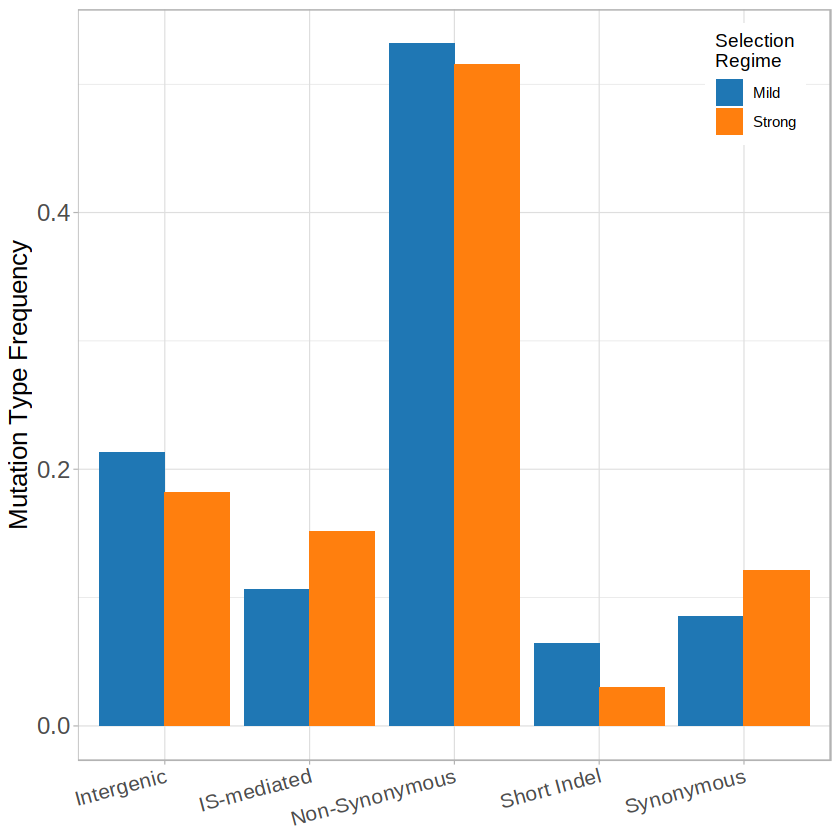

In [16]:
ms_ss_mtf_plot <- ms_ss_mtf  %>%  
ggplot()+
aes(x=MutType,y=freq,fill=SelRegime)+
geom_bar(stat = 'identity',position = 'dodge')+
ylab('Mutation Type Frequency')+
# ggtitle('Type of Mutations (Without frequency levels filters)')+
scale_fill_manual(values=c('#1f77b4','#FF7F0E'),name='Selection\nRegime',labels=c('Mild','Strong'))+
theme_light()+
theme(legend.position = c(0.8,0.8),
      axis.text.y = element_text(size = 14),
      axis.text.x = element_text(size = 14,angle=15,hjust = 1),
      axis.title.y = element_text(size = 15),
      axis.title.x = element_blank())
ms_ss_mtf_plot
filt_muttype_freq <- rbind(ms_ss_filt %>% group_by(Treatment,MutType) %>% 
tally() %>% filter(Treatment=='MS') %>% 
mutate(freq=n/47),

ms_ss_filt %>% group_by(Treatment,MutType) %>% 
tally() %>% filter(Treatment=='SS') %>% 
mutate(freq=n/33))

filt_muttype_freq_plot <- filt_muttype_freq %>% 
ggplot()+
aes(x=MutType,y=freq,fill=Treatment)+
geom_bar(stat='identity',position = 'dodge')+
ylab('Mutation Type Frequency')+
# ggtitle('Type of Mutations (With frequency levels filters)')+
theme_light()+
theme(axis.text.y = element_text(size = 14),
      axis.text.x = element_text(size = 12,angle=15,hjust = 1),
      axis.title.y = element_text(size = 15),
      axis.title.x = element_blank())+
scale_fill_manual(values=c('#1f77b4','#FF7F0E'),name='Selection\nRegime',labels=c('Mild','Strong'))+
theme(axis.text.y = element_text(size = 14),
      axis.text.x = element_text(size = 12,angle=15,hjust = 1),
      axis.title.y = element_text(size = 15),
      axis.title.x = element_blank(),
     legend.position=c(0.9,0.9))

filt_muttype_freq_plot

In [25]:
cumsum_MIC <- read.csv('../../cumsum_MIC.csv')
cumsum_MIC

X,Treatment1,Phase,Replicate,Generations,Nmut,Nmut_cum,MIC,Treatment2
<int>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,SS,3,R2,161.63,10,42,15.3,Treatment
2,SS,1,R2,41.00,17,17,10.0,Treatment
3,SS,1,R3,40.69,19,19,10.0,Treatment
4,SS,1,R4,45.59,26,26,10.0,Treatment
5,MS,1,R2,83.34,89,89,10.0,Treatment
6,SS,3,R4,183.49,17,72,10.0,Treatment
7,SS,3,R3,177.65,8,44,10.0,Treatment
8,MS,3,R2,217.12,20,172,10.0,Treatment
9,MS,2,R1,145.95,35,59,9.2,Treatment


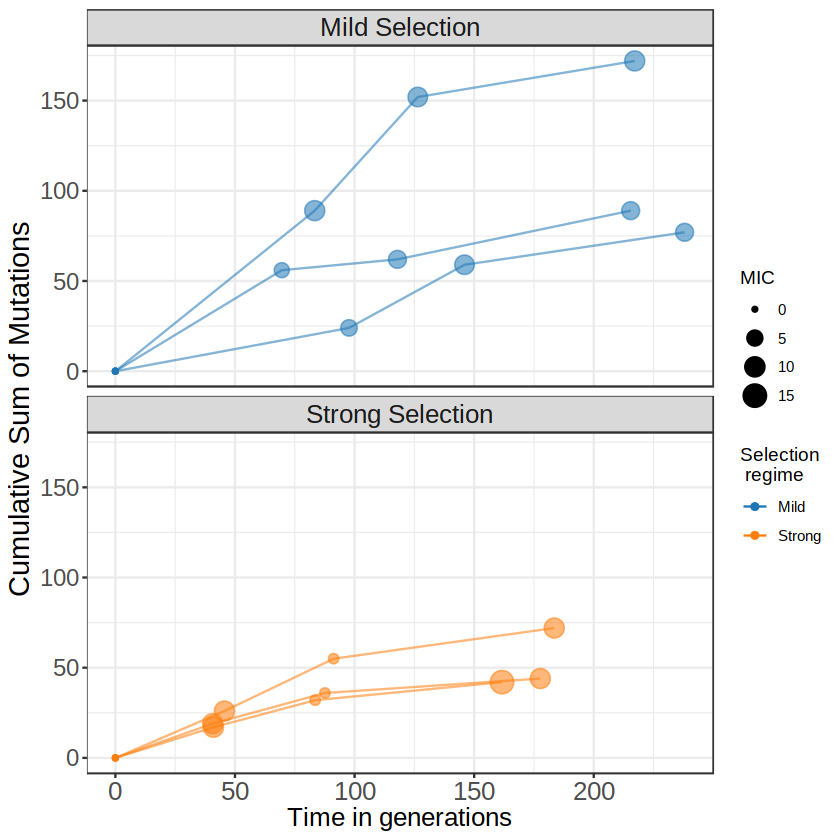

In [30]:
cum_sum_mic <-cumsum_MIC %>% arrange(desc(MIC))  %>% 
ggplot()+
aes(x=Generations,y=Nmut_cum,color=Treatment1,group=interaction(Treatment1,Replicate),alpha=0.7)+
geom_point(aes(size=MIC))+
geom_line()+
xlab('Time in generations')+ylab('Cumulative Sum of Mutations')+
scale_color_manual(values=c('#1f77b4','#FF7F0E'),name='Selection\n regime', labels=c('Mild','Strong'))+
# scale_alpha_manual(values=c(0.,0.5,0.8,1))+
theme_bw()+guides(alpha = "none")+
theme(strip.text = element_text(size=15),
      axis.text.y = element_text(size=14) ,
      axis.text.x = element_text(size=15),
      axis.title.y = element_text(size=17),
      axis.title.x = element_text(size=15))+

facet_wrap(~Treatment1,nrow=2,labeller = labeller(Treatment1 = 
    c("MS" = "Mild Selection",
      "SS" = "Strong Selection")
  ))
cum_sum_mic 





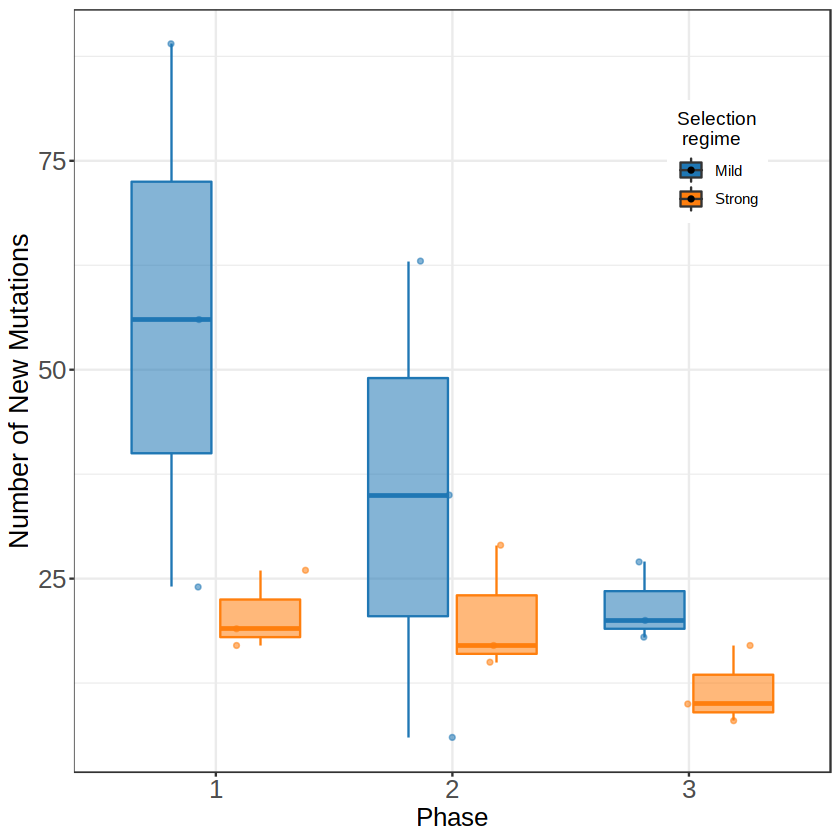

In [31]:

nmut_plot <- cumsum_MIC %>% filter(Generations!=0) %>% 
ggplot()+
aes(x=factor(Phase),y=Nmut,fill=Treatment1,color=Treatment1,alpha=0.7)+
geom_boxplot()+
  geom_point(aes(x=factor(Phase), y=Nmut, colour=Treatment1), size=1, position=position_jitterdodge())+
ylab('Number of New Mutations')+xlab('Phase')+
theme_bw()+
scale_fill_manual(values=c('#1f77b4','#FF7F0E'),name='Selection\n regime', labels=c('Mild','Strong'))+
scale_color_manual(values=c('#1f77b4','#FF7F0E'),name='Selection\n regime', labels=c('Mild','Strong'))+
guides(alpha = "none",color='none')+
theme(axis.text.y = element_text(size=15) ,
      axis.text.x = element_text(size=15),
      axis.title.y = element_text(size=16),
      axis.title.x = element_text(size=15),
      legend.position = c(0.85,0.8))
nmut_plot

In [34]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggthemes’:

    theme_map




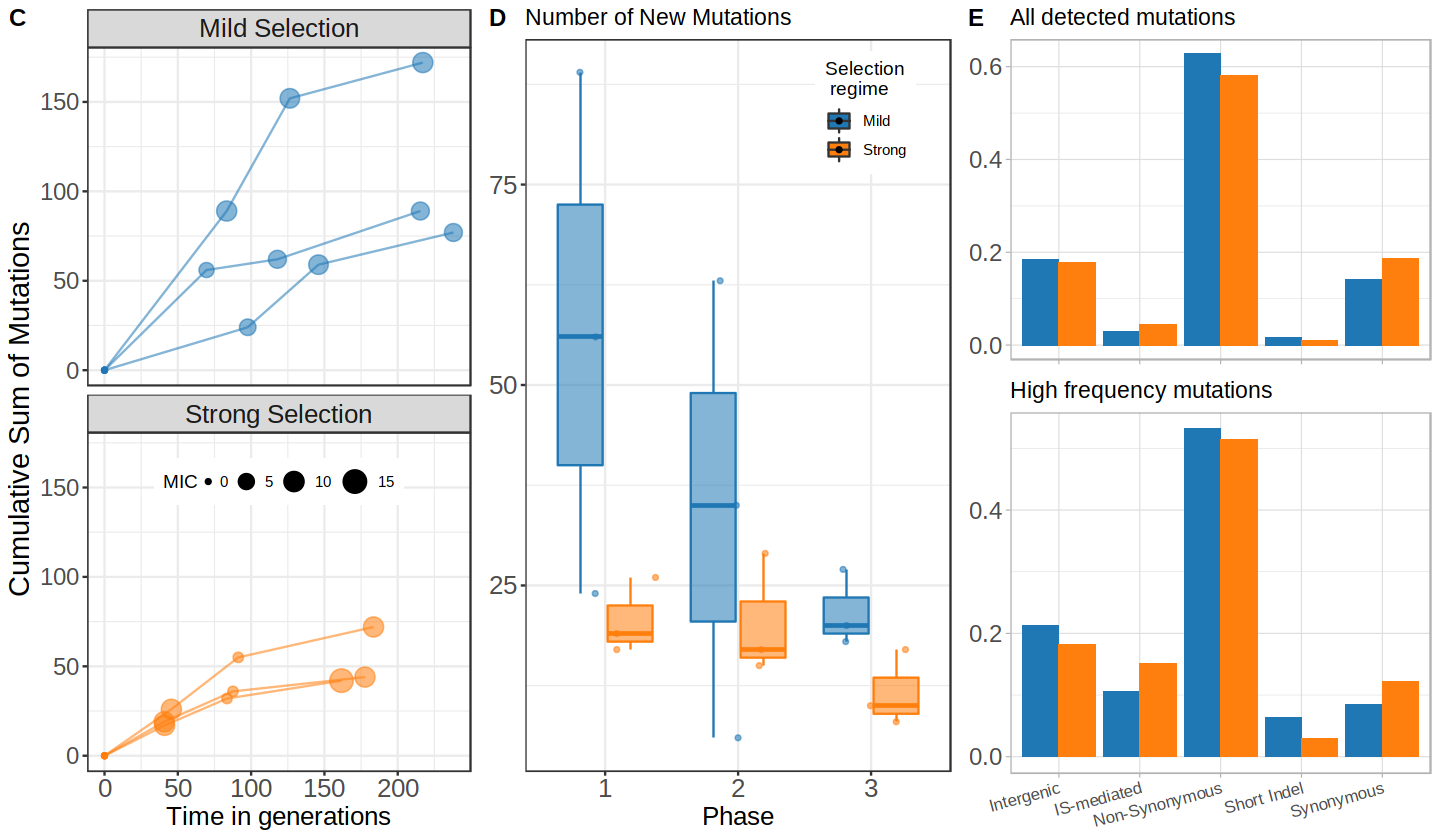

In [36]:
options(repr.plot.width = 12, repr.plot.height = 7)

C <- plot_grid(ms_ss_mtf_plot+
               theme(axis.title.y = element_blank(),
                                    axis.text.x = element_blank())+
               guides(alpha = "none",color='none',fill='none')+
               ggtitle('All detected mutations'),
               filt_muttype_freq_plot+theme(axis.title.y = element_blank(),
                                            axis.text.x = element_text(size=10))+
               ggtitle('High frequency mutations')+
               guides(alpha = "none",color='none',fill='none'),
         nrow=2,rel_heights= c(0.8,1))

ABC <- plot_grid(cum_sum_mic+labs(fill = "MIC")+
                 theme(legend.direction = 'horizontal',
                            legend.position = c(0.5,0.4),
#                             legend.position = 'bottom',
                           legend.key.size = unit(0.05, 'cm'))+
          guides(alpha = "none",color='none',fill='none'),
          nmut_plot+theme(axis.title.y = element_blank(),
                          legend.position = c(0.8,0.9))+
          ggtitle('Number of New Mutations'),
          C,
         nrow=1,labels=c('C','D','E'))
ABC